# Lecture 13 - Exploring Spatial Data
* Website: https://gishub.org/geog-312  
* Instructor: [Qiusheng Wu](https://wetlands.io)
* [Jupyter Notebook Tips and Tricks](http://bit.ly/34embJh)
* [Markdown Cheatsheet](http://bit.ly/2UkNVXV)
* Magic command to list all variables: `%whos`

## Data
* https://github.com/giswqs/geog-312/raw/gh-pages/Lectures/data/lecture13_data.zip

## Checking for the Existence of Data

* **Two types of paths**
    - System paths
    - Catalog paths
* **General syntax**
    - os.path.exists(<dataset>)
    - arcpy.Exists(<dataset>)


In [ ]:
try:
    import archook #The module which locates arcgis
    archook.get_arcpy()
    import arcpy
except ImportError:
    print("import arcpy error")

In [1]:
import os
data_dir = os.path.join(os.getcwd(), 'data')
file_path = os.path.join(data_dir, 'cities.shp')
os.path.exists(file_path)

True

In [2]:
import arcpy
data_dir = os.path.join(os.getcwd(), 'data')
file_path = os.path.join(data_dir, 'cities.shp')
arcpy.Exists(file_path)

True

In [3]:
import os
data_dir = os.path.join(os.getcwd(), 'data')
file_path = os.path.join(data_dir, 'testdata.gdb/buffers_poly')
os.path.exists(file_path)

False

In [4]:
import os, arcpy
data_dir = os.path.join(os.getcwd(), 'data')
file_path = os.path.join(data_dir, 'testdata.gdb/buffers_poly')
print(file_path)
arcpy.Exists(file_path)

/media/hdd/Dropbox/git/teaching/geog-312/Lectures/data/testdata.gdb/buffers_poly


True

## Describing Data

* **The Describe function is used to determine properties of dataset**
* **General syntax**
    - import arcpy
    - < variable> = arcpy.Describe(< input dataset>)
* **Online help**
    - <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/describe.htm>


In [5]:
import arcpy
file_path = os.path.join(os.getcwd(), 'data/cities.shp')
desc = arcpy.Describe(file_path)
print(desc.datatype)
print(desc.shapeType)

ShapeFile
Point


In [6]:
import arcpy
arcpy.env.workspace = os.path.join(os.getcwd(), 'data')
arcpy.env.overwriteOutput = True
infc = "railroads.shp"
clipfc = "new_mexico.shp"
# clipfc = "cities.shp"
outfc = "Results/railroads_clip.shp"
desc = arcpy.Describe(clipfc)
type = desc.shapeType
if type == "Polygon":
    arcpy.Clip_analysis(infc, clipfc, outfc)
    print("Clip analysis run successfully.")
else:
    print("The clip features are not polygons.")

Clip analysis run successfully.


## Display shapefiles in Jupyter Notebook

* use geopandas
* https://www.linkedin.com/pulse/using-geopandas-display-shapefiles-jupyter-notebooks-andrew-cutts
* http://geopandas.org/mapping.html

### How to install the geopandas package
Open Anaconda Prompt and enter the following commands
* `conda activate arcgis`
* `pip install -y geopandas descartes`

In [7]:
import geopandas as gpd

In [8]:
import os
workspace = os.path.join(os.getcwd(), 'data')

In [9]:
railroads = gpd.read_file(os.path.join(workspace, 'railroads.shp'))
new_mexico = gpd.read_file(os.path.join(workspace, 'new_mexico.shp'))
railroads_clip = gpd.read_file(os.path.join(workspace, 'Results/railroads_clip.shp'))

In [10]:
print(railroads_clip.head())

   FNODE_  TNODE_    LENGTH  RAILRDL020  \
0    4746    4747  0.557005        5898   
1    4878    4877  0.337298        6036   
2    4924    4925  0.259129        6089   
3    5096    4925  1.256210        6310   
4    5127    5096  0.225848        6346   

                                           RROWNER1 RROWNER2 RROWNER3 MARK1  \
0  Burlington Northern and Santa Fe Railway Company     None     None  BNSF   
1  Burlington Northern and Santa Fe Railway Company     None     None  BNSF   
2           Santa Fe Southern Railway, Incorporated     None     None   SFS   
3  Burlington Northern and Santa Fe Railway Company     None     None  BNSF   
4  Burlington Northern and Santa Fe Railway Company     None     None  BNSF   

  MARK2 MARK3                                           geometry  
0  None  None  LINESTRING (-104.91429 36.85652, -104.91394 36...  
1  None  None  LINESTRING (-108.88889 35.49603, -108.88841 35...  
2  None  None  LINESTRING (-105.95210 35.67880, -105.95290 35... 

In [11]:
print(new_mexico.head())

     AREA  PERIMETER  STATESP020       STATE STATE_FIPS  ORDER_ADM MONTH_ADM  \
0  30.888     23.674        1905  New Mexico         35         47   January   

   DAY_ADM  YEAR_ADM                                           geometry  
0        6      1912  POLYGON ((-109.04488 36.99863, -108.53622 36.9...  


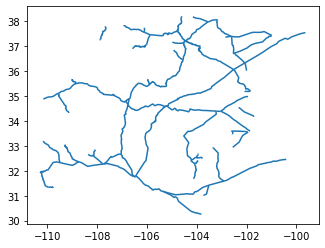

In [12]:
# magic command to display plots within Jupyter Notebook
%matplotlib inline  
railroads.plot()

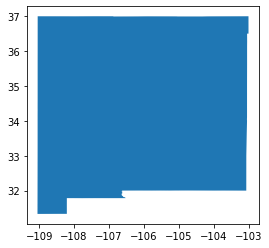

In [13]:
new_mexico.plot()

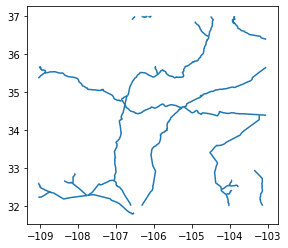

In [14]:
railroads_clip.plot()

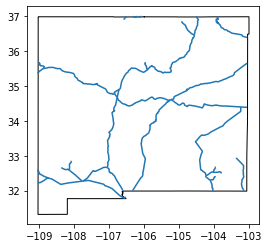

In [15]:
base = new_mexico.plot(color='white', edgecolor='black')
railroads_clip.plot(ax=base)

## The Describe function

* Describe function will always return a **Describe object**
* The Describe function returns a set of **generic properties** for all Describe objects.

![](https://wetlands.io/file/teaching/geog-503/images/describe_function.png)

* **Generic Describe Object Properties**

![](https://wetlands.io/file/teaching/geog-503/images/generic_describe_props.png)

In [16]:
import arcpy
data = os.path.join(os.getcwd(), 'data/cities.shp')
desc = arcpy.Describe(data)
print("baseName:    {}".format(desc.baseName))
print("catalogPath: {}".format(desc.catalogPath))
print("file:        {}".format(desc.file))
print("name:        {}".format(desc.name))
print("path:        {}".format(desc.path))
print("dataType:    {}".format(desc.dataType))
print("extension:   {}".format(desc.extension))

baseName:    cities
catalogPath: /media/hdd/Dropbox/git/teaching/geog-312/Lectures/data/cities.shp
file:        cities.shp
name:        cities.shp
path:        /media/hdd/Dropbox/git/teaching/geog-312/Lectures/data
dataType:    ShapeFile
extension:   shp


## Feature class Describe properties

![](https://wetlands.io/file/teaching/geog-503/images/fc_desc_props.png)

### Feature Class properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/featureclass-properties.htm>

![](https://wetlands.io/file/teaching/geog-503/images/fc_props.png)

In [17]:
import arcpy

# Create a Describe object from the feature class
data = os.path.join(os.getcwd(), 'data/cities.shp')
desc = arcpy.Describe(data)

# Print some feature class properties
print("Feature Type:  {}".format(desc.featureType))
print("Shape Type :   {}".format(desc.shapeType))
print("Spatial Index: {}".format(desc.hasSpatialIndex))

Feature Type:  Simple
Shape Type :   Point
Spatial Index: True


### Table properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/table-properties.htm>

![](https://wetlands.io/file/teaching/geog-503/images/table_props.png)

In [18]:
import arcpy
# Create a Describe object from the table.
data = os.path.join(os.getcwd(), 'data/cities.shp')
desc = arcpy.Describe(data)
# If the table has an OID, print the OID field name
if desc.hasOID:
    print("OIDFieldName: {}".format(desc.OIDFieldName))
# Print the names and types of all the fields in the table
for field in desc.fields:
    print("{:22} : {}".format(field.name,field.type))

OIDFieldName: FID
FID                    : OID
Shape                  : Geometry
CITIESX020             : Double
FEATURE                : String
NAME                   : String
POP_RANGE              : String
POP_2000               : Integer
FIPS55                 : String
COUNTY                 : String
FIPS                   : String
STATE                  : String
STATE_FIPS             : String
DISPLAY                : SmallInteger


### Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/dataset-properties.htm>

![](https://wetlands.io/file/teaching/geog-503/images/dataset_props.png)

In [19]:
import arcpy
data = os.path.join(os.getcwd(), 'data/new_mexico.shp')
desc = arcpy.Describe(data)
print("Dataset Type: {0}".format(desc.datasetType))
print("Extent:\n  XMin: {0}, XMax: {1}, YMin: {2}, YMax: {3}".format(
    desc.extent.XMin, desc.extent.XMax, desc.extent.YMin, desc.extent.YMax))
print("Spatial reference name: {0}:".format(desc.spatialReference.name))

Dataset Type: FeatureClass
Extent:
  XMin: -109.05010223388672, XMax: -103.00065612792969, YMin: 31.331899642944336, YMax: 36.99942398071289
Spatial reference name: GCS_North_American_1983:


### Raster Describe properties

![](https://wetlands.io/file/teaching/geog-503/images/raster_desc.png)

### Raster Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-dataset-properties.htm>

![](https://wetlands.io/file/teaching/geog-503/images/raster_dataset_props.png)

In [20]:
import arcpy
data = os.path.join(os.getcwd(), 'data/testdata.gdb/ElevationFloat')
desc = arcpy.Describe(data)
print("{:20} {}".format("bandCount:",desc.bandCount))
print("{:20} {}".format("compressionType:",desc.compressionType))
print("{:20} {}".format("format:",desc.format))

bandCount:           1
compressionType:     NONE
format:              FGDBR


### Raster Band properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-band-properties.htm>

![](https://wetlands.io/file/teaching/geog-503/images/raster_band_props.png)

In [21]:
import arcpy
data = os.path.join(os.getcwd(), 'data/testdata.gdb/ElevationFloat')
desc = arcpy.Describe(data)
print("{:15} {}".format("height: ", desc.height))
print("{:15} {}".format("width:", desc.width))
print("{:15} {}".format("pixelType:", desc.pixelType))
print("{:15} {}".format("isInteger:", desc.isInteger))

height:         207
width:          233
pixelType:      F32
isInteger:      False


## Describing Data: Example

In [22]:
import arcpy
arcpy.env.workspace = os.path.join(os.getcwd(), "data/testdata.gdb")
element = "buffers_poly"
desc = arcpy.Describe(element)
print("{:15} {}".format("Data type: ", desc.dataType))
print("{:15} {}".format("File path: ", desc.path))
print("{:15} {}".format("Catalog path: ", desc.catalogPath))
print("{:15} {}".format("File name: ", desc.file))
print("{:15} {}".format("Base name: ",desc.baseName))
print("{:15} {}".format("Name: ", desc.name))

Data type:      FeatureClass
File path:      /media/hdd/Dropbox/git/teaching/geog-312/Lectures/data/testdata.gdb
Catalog path:   /media/hdd/Dropbox/git/teaching/geog-312/Lectures/data/testdata.gdb/buffers_poly
File name:      buffers_poly
Base name:      buffers_poly
Name:           buffers_poly


## Describing a feature class and raster

You can use the Describe object **dataType** property to determine what is being described. Some of the values returned by the **dataType** property include:

* FeatureLayer
* FeatureClass
* File
* Folder
* LasDataset
* Layer
* MosaicDataset
* NetworkDataset
* RasterBand
* RasterDataset
* ShapeFile
* Table
* TextFile
* Toolbox

The complete list of dataType can be found at:
<http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/arcinfo-item-properties.htm>

The **hasattr()** function returns a Boolean value. An example of using the function with the Describe object is shown below.

In [23]:
import arcpy
arcpy.env.workspace = os.path.join(os.getcwd(), "data/testdata.gdb")
element = "ElevationFloat"
# element = "buffers_poly"
desc = arcpy.Describe(element)
if hasattr(desc, "name"):
    print("Name: {}".format(desc.name))
if hasattr(desc, "bandCount"):
    print("Raster bands: {}".format(str(desc.bandCount)))
if hasattr(desc, "shapeType"):
    print("Shape type: {}".format(desc.shapeType))

Name: ElevationFloat
Raster bands: 1


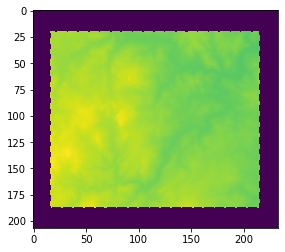

In [24]:
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = os.path.join(os.getcwd(), "data/testdata.gdb")
image = arcpy.RasterToNumPyArray("ElevationInt")
plt.imshow(image)
plt.show()

## List Data

* **Listing data is very common**
* **Several different list functions in ArcPy**
    - ListFields
    - ListIndexes
    - ListDataset
    - ListFeatureClasses
    - ListFiles
    - ListRasters
    - ListTables
    - ListWorkspaces
    - ListVersions
    
* **Similar logic:**
    - Create a list
    - Iterate over the list using a for loop
    
The complete list data functions can be found at <>http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/listdatasets.htm


### Listing Feature Classes

* **The ListFeatureClasses function returns a list of feature classes in the current workspace**
* **General syntax:**
    - ListFeatureClasses ({wild_card}, {feature_type}, {feature_dataset})
    
* **No filtering:**
    - fclist = arcpy.ListFeatureClasses()
* **Filtering based on wild card**
    - fclist = arcpy.ListFeatureClasses("c*")
* **Filtering based on feature type**
    - fclist = arcpy.ListFeatureClasses("", "point")


In [25]:
import arcpy
from arcpy import env 
env.workspace = os.path.join(os.getcwd(), 'data')
fclist = arcpy.ListFeatureClasses()
print(fclist)

['amtrak_stations.shp', 'cities.shp', 'counties.shp', 'new_mexico.shp', 'railroads.shp']


In [26]:
import arcpy
from arcpy import env 
env.workspace = os.path.join(os.getcwd(), 'data')
fclist = arcpy.ListFeatureClasses("*es.shp")
print(fclist)

['cities.shp', 'counties.shp']


## Listing Fields

* The **ListFields** function lists the fields in a feature class or table in a specified dataset.
* General syntax:
    - ListFields(dataset, {wild_card}, {field_type})


In [27]:
import arcpy
from arcpy import env
env.workspace = os.path.join(os.getcwd(), 'data')
fieldlist = arcpy.ListFields("cities.shp")
for field in fieldlist:
    print("{:15} : {}".format(field.name,field.type))

FID             : OID
Shape           : Geometry
CITIESX020      : Double
FEATURE         : String
NAME            : String
POP_RANGE       : String
POP_2000        : Integer
FIPS55          : String
COUNTY          : String
FIPS            : String
STATE           : String
STATE_FIPS      : String
DISPLAY         : SmallInteger


## Using Lists in for loops

The following script creates a list of fields of type String and determines for each text field what the length of the field is

In [28]:
import arcpy
from arcpy import env
env.workspace = os.path.join(os.getcwd(), 'data')
fieldlist = arcpy.ListFields("cities.shp","", "String")
for field in fieldlist:
    print("{:15} {}".format(field.name, str(field.length)))

FEATURE         27
NAME            48
POP_RANGE       21
FIPS55          5
COUNTY          55
FIPS            5
STATE           2
STATE_FIPS      2


The following script creates a list of TIFF files and iterates through each file in the list to build pyramids

In [29]:
import arcpy
from arcpy import env
env.workspace = os.path.join(os.getcwd(), 'data')
tifflist = arcpy.ListRasters("", "TIF" )
for tiff in tifflist:
    arcpy.BuildPyramids_management(tiff)